In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
import pandas as pd

In [4]:
def load_logfile(filename):
    text=[]
    time = []
    process = []
    level = []
    func = []
    msg = []
    SY = []
    with open(filename) as f: 
        for line in (f): 
            text.append(line)
            if line != 'SY\n':
                asctime, processName, levelname, funcName, message = line.split(' - ')
    #             print asctime, processName, levelname, funcName, message
                time.append(asctime.strip())
                process.append(processName.strip())
                level.append(levelname.strip())
                func.append(funcName.strip())
                msg.append(message.strip())
            if line == 'SY\n':
                SY.append(msg[-1])
                
    sync_time = int(SY[0].split(',')[0])
    sync_time
    log = pd.DataFrame(
        {'time': time,
         'process': process,
         'level': level,
         'func': func,
         'msg': msg
        })
    
    return log, sync_time

In [6]:
text=[]
time = []
process = []
level = []
func = []
msg = []

In [4]:
SY = []
with open('./trajectory.log') as f: 
    for line in (f): 
        text.append(line)
        if line != 'SY\n':
            asctime, processName, levelname, funcName, message = line.split(' - ')
#             print asctime, processName, levelname, funcName, message
            time.append(asctime.strip())
            process.append(processName.strip())
            level.append(levelname.strip())
            func.append(funcName.strip())
            msg.append(message.strip())
        if line == 'SY\n':
            SY.append(msg[-1])

In [5]:
SY

['121713, [137836, 118028, 0]',
 '122734, [135930, 118185, 0]',
 '124743, [133866, 118599, 0]']

In [6]:
(122734-121713)/1e3

1.021

In [7]:
(124743-122734)/1e3

2.009

In [8]:
sync_time = int(SY[0].split(',')[0])
sync_time

121713

## Construct table

In [10]:
log = pd.DataFrame(
    {'time': time,
     'process': process,
     'level': level,
     'func': func,
     'msg': msg
    })

In [11]:
# log['time'] = pd.to_datetime(log['time'])

In [7]:
log.head(230)

,func,level,msg,process,time
0,load_maze,INFO,load /opt/localuser/Work/pydev/playground/play...,MainProcess,"2018-07-18 17:59:36,996"
1,load_maze,INFO,load /opt/localuser/Work/pydev/playground/play...,MainProcess,"2018-07-18 17:59:37,022"
2,load_maze,INFO,load /opt/localuser/Work/pydev/playground/play...,MainProcess,"2018-07-18 17:59:37,574"
3,load_maze,INFO,load /opt/localuser/Work/pydev/playground/play...,MainProcess,"2018-07-18 18:00:47,298"
4,load_maze,INFO,load /opt/localuser/Work/pydev/playground/play...,MainProcess,"2018-07-18 18:00:47,316"
5,load_maze,INFO,load /opt/localuser/Work/pydev/playground/play...,MainProcess,"2018-07-18 18:00:47,736"
6,load_maze,INFO,load /opt/localuser/Work/pydev/playground/play...,MainProcess,"2018-07-18 18:07:03,392"
7,load_maze,INFO,load /opt/localuser/Work/pydev/playground/play...,MainProcess,"2018-07-18 18:07:03,411"
8,load_maze,INFO,load /opt/localuser/Work/pydev/playground/play...,MainProcess,"2018-07-18 18:07:03,862"
9,load_maze,INFO,load /opt/localuser/Work/pydev/playground/play...,MainProcess,"2018-07-18 21:00:13,816"


In [5]:
def get_log_sessions(log):
    jov_starts = log[np.logical_and(log['process']=='MainProcess', log['msg']=='jovian_process_start')]
    jov_stops = log[np.logical_and(log['process']=='MainProcess', log['msg']=='jovian_process_stop')]
    log_sessions = [log[jov_starts.index[i]+1:jov_stops.index[i]] for i in range(jov_starts.index.shape[0])]
    return log_sessions

In [6]:
def get_trajectory(log, sync_time=None):
    locs = log[log['func']=='_jovian_process']['msg'].values
    datum = np.array([[int(_) for _ in loc.replace('[','').replace(']','').split(',')] for loc in locs])
    ts = datum[:,0]
    pos = datum[:, 1:]
    if sync_time is not None:
        start_idx = np.where(ts==sync_time)[0][0]
        ts = datum[start_idx:,0]
        pos = datum[start_idx:, 1:]
    return ts, pos

## Load log, get session, get `ts` and `pos`

In [3]:
log, sync_time = load_logfile('./trajectory.log')

NameError: name 'load_logfile' is not defined

In [4]:
log_sessions = get_log_sessions(log)

NameError: name 'get_log_sessions' is not defined

In [12]:
session_id = 2
ts, pos = get_trajectory(log_sessions[session_id], sync_time)

In [13]:
ts

array([121713, 121731, 121749, ..., 912964, 912982, 913000])

## playground logger class

In [3]:
from playground.base import logger

In [4]:
log = logger('./trajectory.log')

In [5]:
log.sync_time

121713

In [6]:
log.log_sessions[2].shape

(46831, 5)

In [7]:
ts, pos = log.to_trajectory(2)

In [8]:
ts

array([0.00000000e+00, 1.73292234e-02, 3.46584468e-02, ...,
       7.91252342e+02, 7.91269671e+02, 7.91287000e+02])

In [9]:
from scipy import signal

In [10]:
w = signal.gaussian(59, 6)

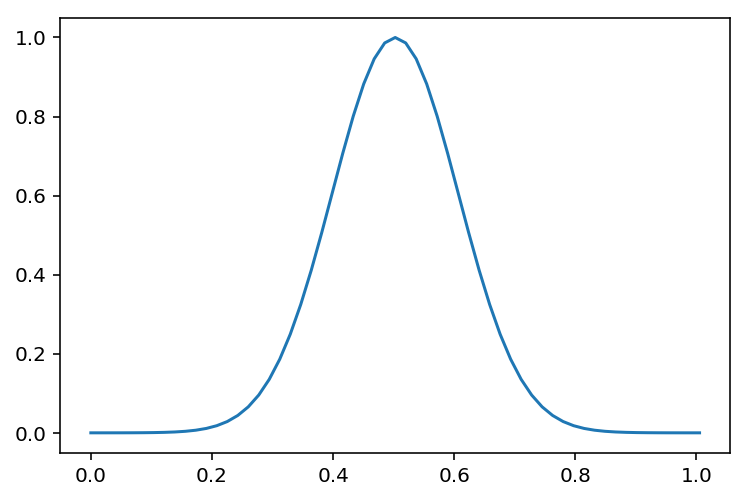

In [11]:
plot(ts[:len(w)], w)

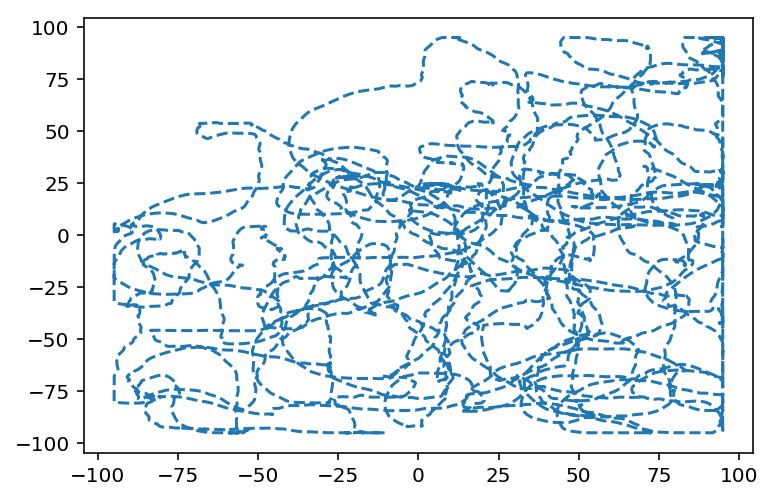

In [12]:
plot(pos[:,0], pos[:,1], '--')

In [13]:
v_smoothed, v = log.get_speed(ts, pos)

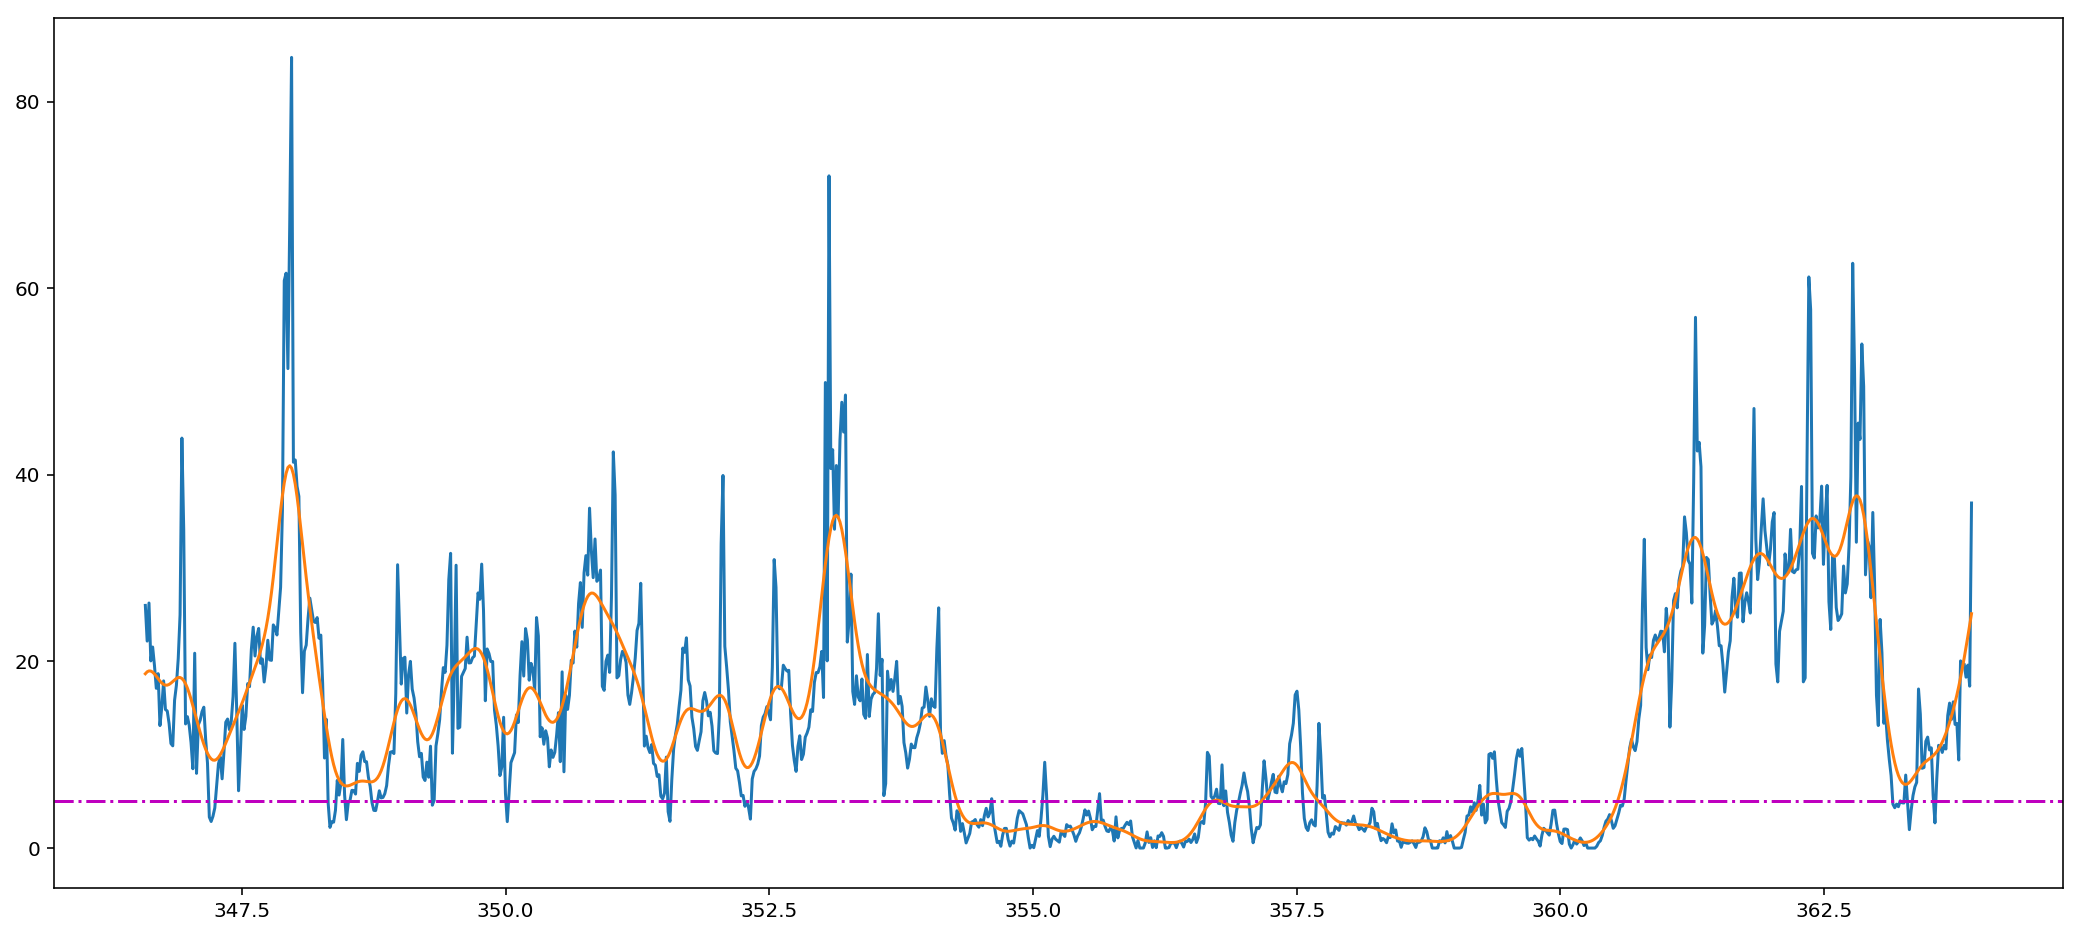

In [14]:
f, ax = plt.subplots(1,1, figsize=(18,8))
offset=20000
plot(ts[offset:1000+offset], v[offset:1000+offset])
plot(ts[offset:1000+offset], v_smoothed[offset:1000+offset])
ax.axhline(5, c='m', ls='-.')

In [11]:
np.diff(ts)

array([0.01732922, 0.01732922, 0.01732922, ..., 0.01732922, 0.01732922,
       0.01732922])

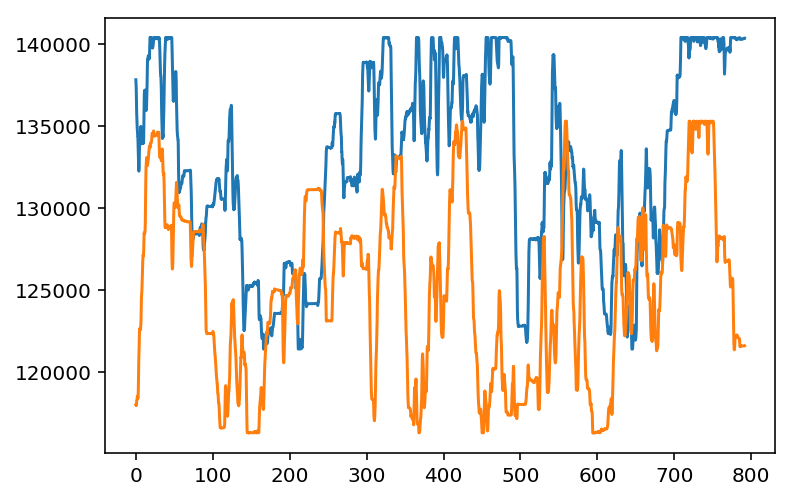

In [10]:
plot(ts, pos[:,0])
plot(ts, pos[:,1])

In [32]:
np.savez('./trajectory.npz', ts=ts, pos=pos)

In [33]:
_t = np.load('./trajectory.npz')['ts']
_pos = np.load('./trajectory.npz')['pos']

In [34]:
_t

array([0.00000e+00, 1.80000e-02, 3.60000e-02, ..., 7.91251e+02,
       7.91269e+02, 7.91287e+02])

In [35]:
_pos

array([[137836, 118028,      0],
       [137807, 118026,      0],
       [137776, 118025,      0],
       ...,
       [140375, 121622,      0],
       [140375, 121622,      0],
       [140375, 121622,      0]])

In [9]:
RD = log[log['func']=='on_event']['msg'].values
RD

array(['state: 1cue, touch: _dcue_000@[139317. 117614.      0.]',
       'state: 1cue',
       'state: 1cue, touch: _dcue_000@[128817.01 128514.        0.  ]',
       'state: 1cue',
       'state: 1cue, touch: _dcue_000@[130117.01 120814.        0.  ]',
       'state: 1cue',
       'state: 1cue, touch: _dcue_000@[124617.01 126414.        0.  ]',
       'state: 1cue',
       'state: 1cue, touch: _dcue_000@[123417.01 132314.      500.  ]',
       'state: 1cue',
       'state: 1cue, touch: _dcue_000@[133417. 123514.    500.]',
       'state: 1cue',
       'state: 1cue, touch: _dcue_000@[134517. 129914.      0.]',
       'state: 1cue',
       'state: 1cue, touch: _dcue_000@[130517.01 126914.        0.  ]',
       'state: 1cue',
       'state: 1cue, touch: _dcue_000@[139117. 126914.      0.]',
       'state: 1cue',
       'state: 1cue, touch: _dcue_000@[130617.01 133414.        0.  ]',
       'state: 1cue',
       'state: 1cue, touch: _dcue_000@[122817.01 118214.      500.  ]',
       'stat

In [8]:
RD_locs = RD[4::2]
RD_locs

array(['state: 1cue, touch: _dcue_000@[130117.01 120814.        0.  ]',
       'state: 1cue, touch: _dcue_000@[124617.01 126414.        0.  ]',
       'state: 1cue, touch: _dcue_000@[123417.01 132314.      500.  ]',
       'state: 1cue, touch: _dcue_000@[133417. 123514.    500.]',
       'state: 1cue, touch: _dcue_000@[134517. 129914.      0.]',
       'state: 1cue, touch: _dcue_000@[130517.01 126914.        0.  ]',
       'state: 1cue, touch: _dcue_000@[139117. 126914.      0.]',
       'state: 1cue, touch: _dcue_000@[130617.01 133414.        0.  ]',
       'state: 1cue, touch: _dcue_000@[122817.01 118214.      500.  ]',
       'state: 1cue, touch: _dcue_000@[128817.01 120414.        0.  ]'],
      dtype=object)

In [9]:
rd_locs = np.array([[float(_) for _ in RD_loc.replace('[','').replace(']','').split('@')[1].split(' ')[:2]] 
                    for RD_loc in RD_locs])
rd_locs

array([[130117.01, 120814.  ],
       [124617.01, 126414.  ],
       [123417.01, 132314.  ],
       [133417.  , 123514.  ],
       [134517.  , 129914.  ],
       [130517.01, 126914.  ],
       [139117.  , 126914.  ],
       [130617.01, 133414.  ],
       [122817.01, 118214.  ],
       [128817.01, 120414.  ]])

In [10]:
locs = log[log['func']=='_jovian_process']['msg'].values

In [11]:
trajectory = np.array([[int(_) for _ in loc.replace('[','').replace(']','').split(',')] for loc in locs])

In [12]:
trajectory

array([[10389648,   130917,   125813,        0],
       [10389664,   130917,   125813,        0],
       [10389681,   130917,   125813,        0],
       ...,
       [  912964,   140375,   121622,        0],
       [  912982,   140375,   121622,        0],
       [  913000,   140375,   121622,        0]])

In [13]:
start_idx = np.where(trajectory[:,0]==121731)[0][0]
start_idx

1381

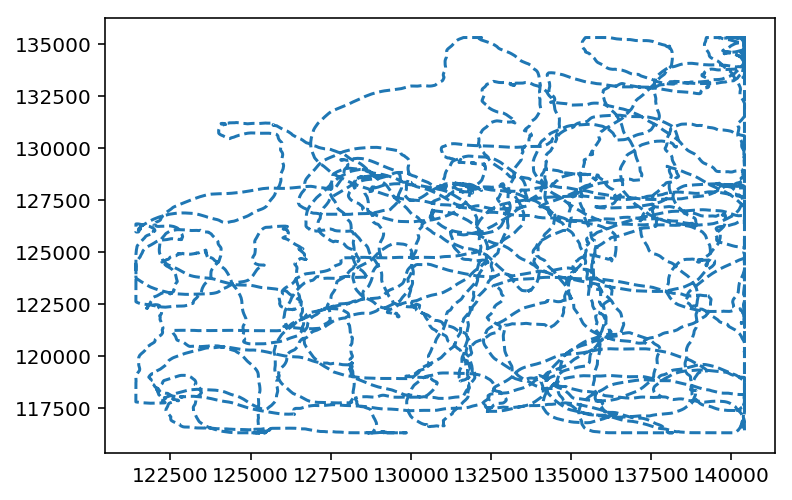

In [15]:
plot(trajectory[start_idx:,1], trajectory[start_idx:,2], '--')

In [16]:
(trajectory[-1,0] - 121731)/1e3

791.269

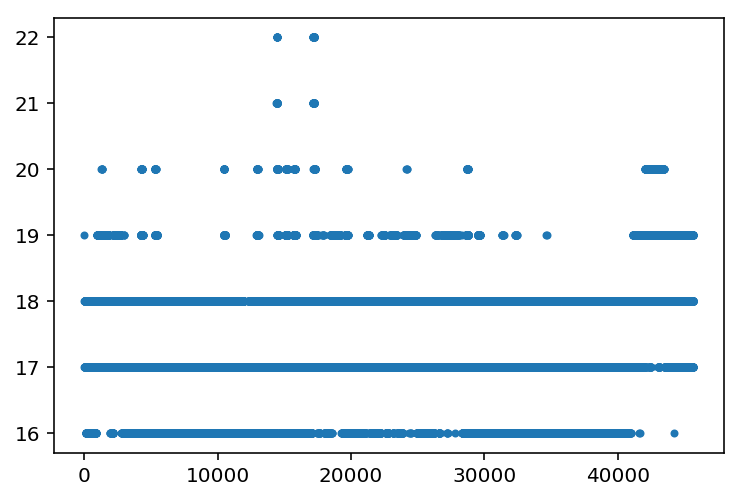

In [17]:
plot(np.diff(trajectory[start_idx:, 0]), '.')

In [18]:
pc_time = np.load('./pc_time.npz')

In [19]:
pc1, pc2 = pc_time['pc1'], pc_time['pc2']

In [20]:
trajectory_time = trajectory[start_idx:, 0]/1e3

In [21]:
trajectory_time -= trajectory_time[0]

In [22]:
trajectory_time

array([0.00000e+00, 1.80000e-02, 3.50000e-02, ..., 7.91233e+02,
       7.91251e+02, 7.91269e+02])

In [23]:
pc1

array([  8.3996 ,   8.40704,   9.3726 ,  14.1646 ,  16.9466 ,  16.95176,
        19.17424,  20.4042 ,  21.81572,  34.10708,  34.12316,  35.14316,
        35.15176,  35.27664,  35.28904,  55.49936,  55.5038 ,  55.50936,
        78.36736,  78.38892,  78.41072,  78.41608,  79.18912,  95.75508,
        95.77316, 116.57468, 116.57884, 116.587  , 116.90096, 116.90456,
       116.92136, 117.02396, 117.2666 , 117.28664, 117.32472, 119.7242 ,
       119.72892, 119.73748, 121.41996, 121.42688, 121.98972, 122.21224,
       122.2336 , 122.23768, 124.6142 , 124.61924, 125.26604, 125.27188,
       125.51324, 125.5218 , 135.35276, 135.35716, 135.37028, 135.38876,
       135.45968, 135.46348, 135.46812, 135.47296, 135.54124, 135.55472,
       135.71736, 135.73104, 135.86644, 135.8792 , 135.88836, 135.89872,
       135.92476, 136.04168, 136.0564 , 136.28104, 136.52464, 136.5294 ,
       136.80512, 136.8094 , 144.8152 , 144.82644, 170.01832, 170.88256,
       177.16892, 209.19168, 209.43908, 209.4448 , 

In [24]:
pc1_idx = np.searchsorted(trajectory_time, pc1)
pc2_idx = np.searchsorted(trajectory_time, pc2)

In [26]:
pos = np.vstack((trajectory[start_idx:,1], trajectory[start_idx:,2])).T

In [27]:
pos.shape

(45662, 2)

In [28]:
from scipy import signal

In [29]:
window = signal.gaussian(30, std=5)/sqrt(2*pi)/5

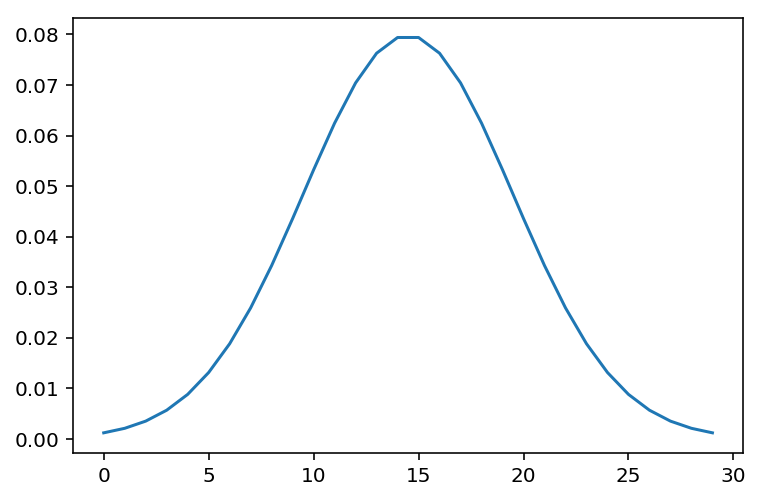

In [30]:
plot(window)

In [31]:
speed = np.linalg.norm(np.diff(pos, axis=0),axis=1)

In [32]:
speed = np.hstack((0, speed))

In [33]:
v = np.convolve(window, speed, mode='same')

In [34]:
v.shape

(45662,)

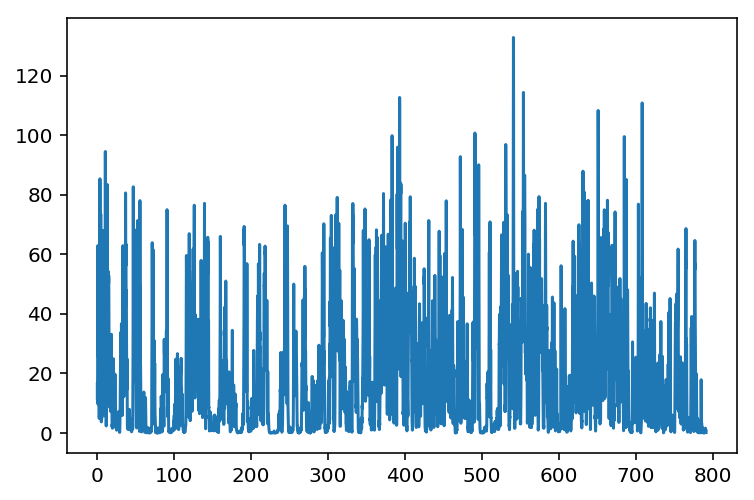

In [35]:
plot(trajectory_time, v)

In [36]:
pc1_idx_clip = np.delete(pc1_idx, np.where(v[pc1_idx]<20)[0])

In [37]:
pc2_idx_clip = np.delete(pc2_idx, np.where(v[pc2_idx]<20)[0])

In [38]:
from matplotlib import cm

In [39]:
pos = pos/100. + np.array([-1309.17, -1258.14])
rd_locs = rd_locs/100. + np.array([-1309.17, -1258.14])

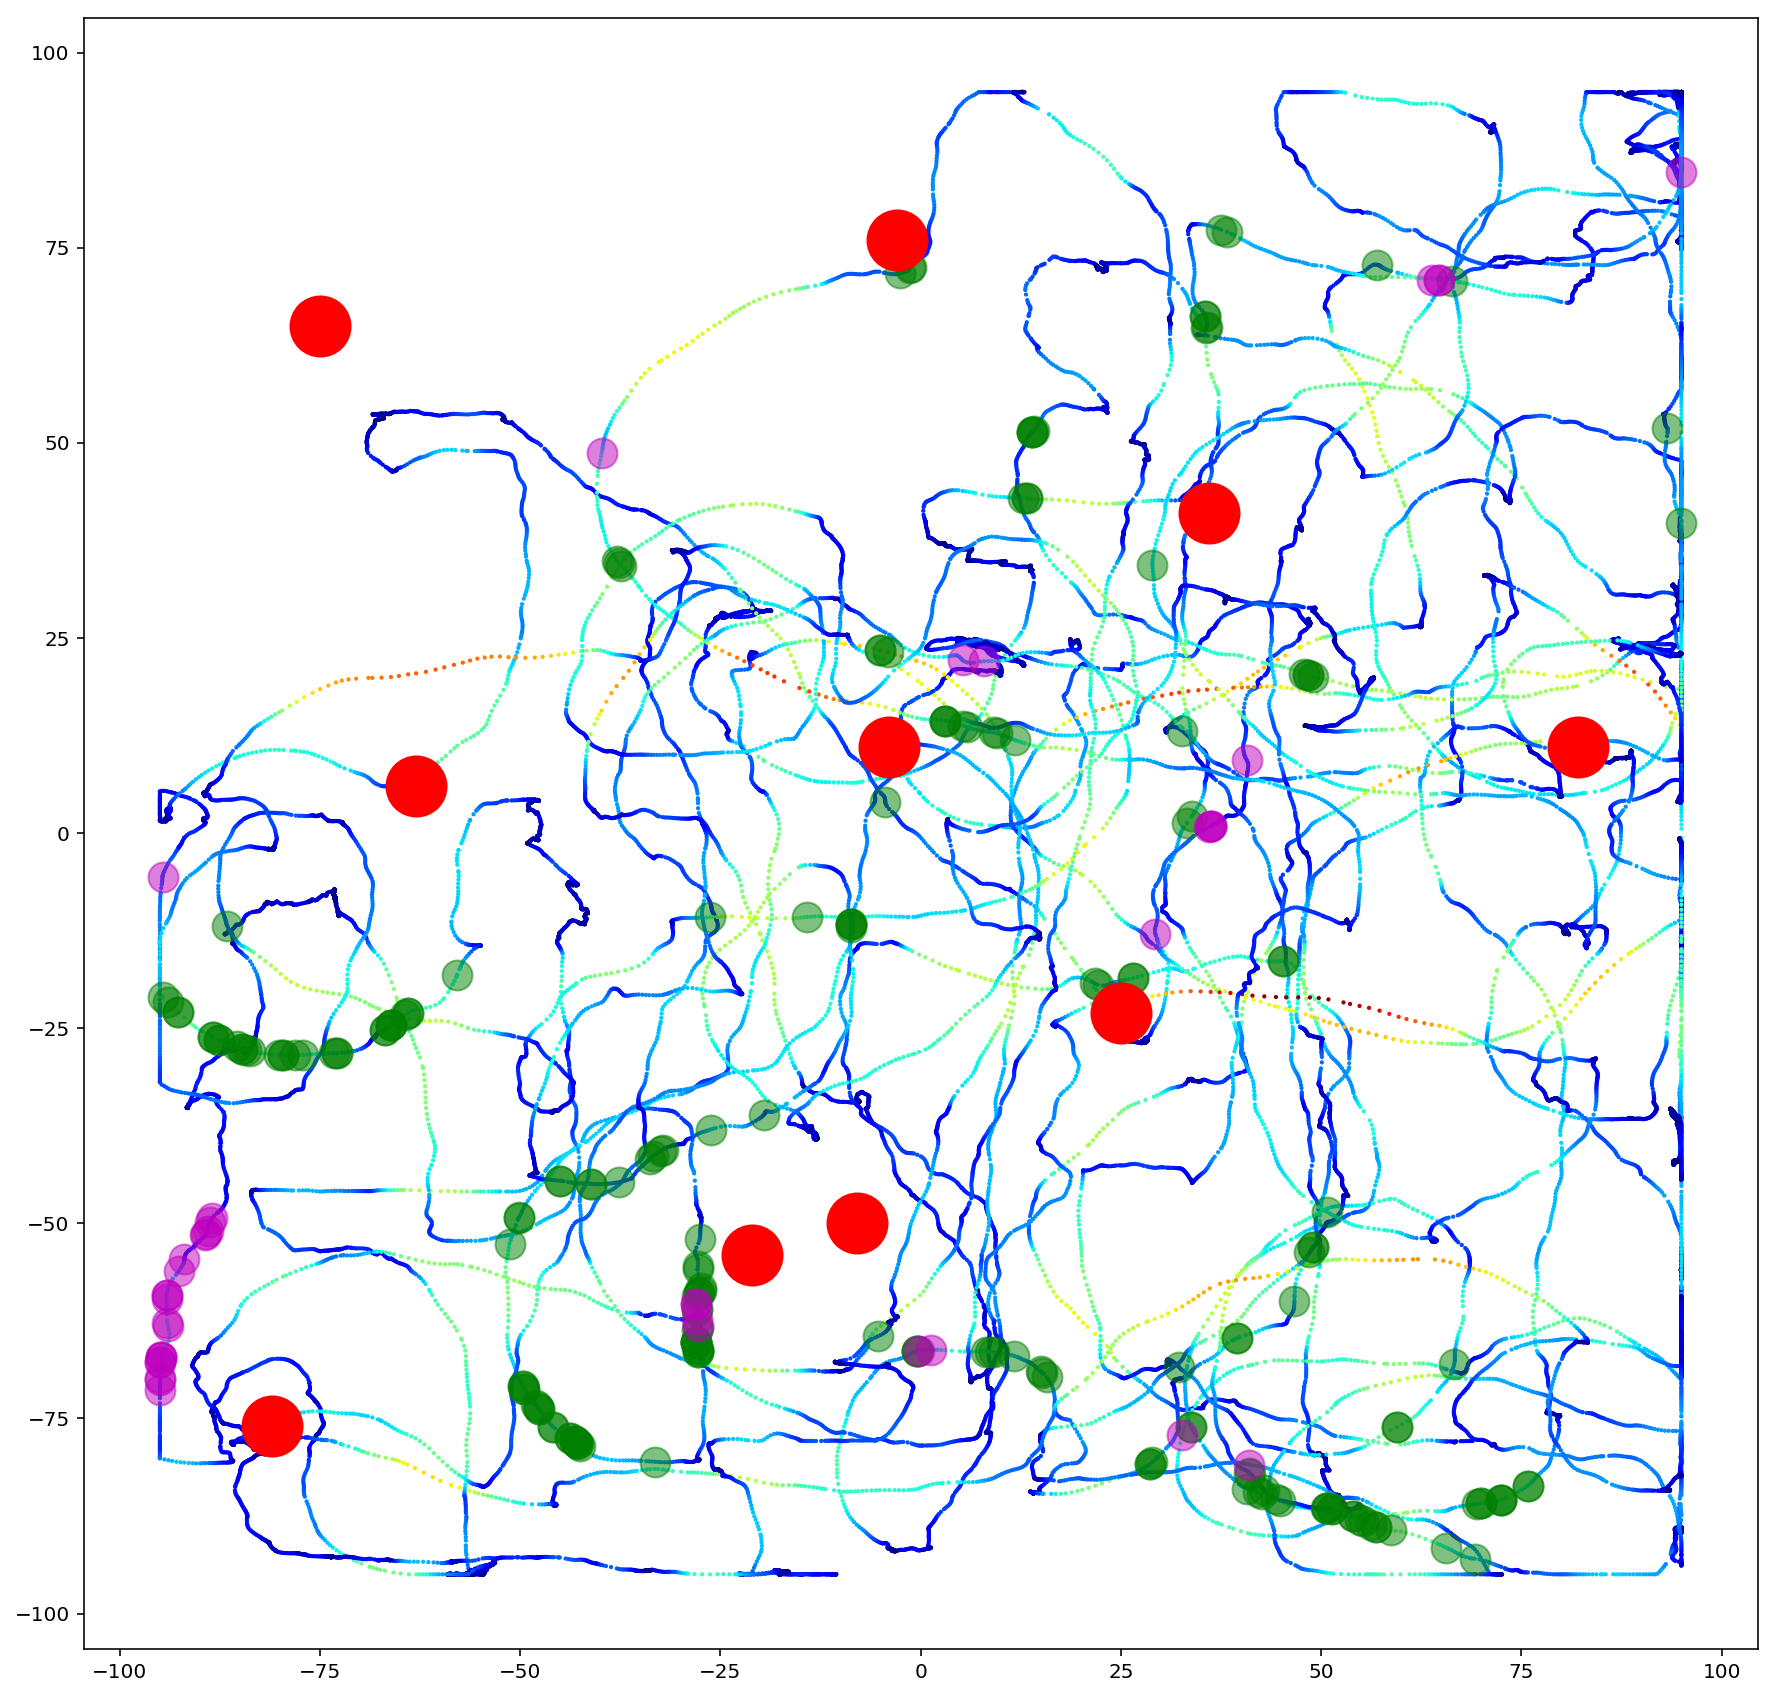

In [40]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
scatter(pos[:,0], pos[:,1], marker='.', s=5, c=v/max(v), cmap=cm.jet)
plot(pos[pc1_idx_clip, 0], pos[pc1_idx_clip, 1], 'go', markersize=15, alpha=0.5)
plot(pos[pc2_idx_clip, 0], pos[pc2_idx_clip, 1], 'mo', markersize=15, alpha=0.5)
plot(rd_locs[:,0], rd_locs[:,1], 'ro', markersize=30)

In [219]:
pc1_idx

array([  486,   487,   544,   822,   980,   980,  1103,  1171,  1250,
        1929,  1930,  1989,  1989,  1996,  1997,  3145,  3145,  3146,
        4465,  4466,  4468,  4468,  4514,  5475,  5476,  6687,  6687,
        6687,  6705,  6706,  6707,  6713,  6726,  6728,  6730,  6870,
        6870,  6871,  6969,  6969,  7002,  7015,  7017,  7017,  7155,
        7155,  7193,  7193,  7207,  7208,  7785,  7785,  7786,  7787,
        7791,  7792,  7792,  7792,  7796,  7797,  7806,  7807,  7815,
        7816,  7816,  7817,  7818,  7825,  7826,  7839,  7853,  7854,
        7870,  7870,  8344,  8345,  9811,  9863, 10236, 12126, 12141,
       12141, 12142, 12146, 12146, 12146, 12148, 12148, 12192, 12192,
       12193, 12201, 12203, 12206, 12206, 12207, 12213, 12214, 12215,
       12215, 12216, 12222, 12222, 12223, 12223, 12232, 12232, 12234,
       12235, 13461, 13463, 14252, 15731, 15732, 15732, 16331, 16354,
       16354, 16355, 16358, 16359, 16391, 16726, 16726, 16769, 16770,
       16770, 16794,